UnRel - The boxes are given in format [xmin,ymin,xmax,ymax] - from unrel README
SPUR - The boxes are given in format [xmin,ymin,width,height]

to plot bounding box, rect plot is in this format patches.Rectangle((xmin,ymin),width,height)


# plot images and bounding boxes

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
                                                                                                                                                8

In [2]:
spur_root="/Users/haidiazaman/Desktop/FYP/y3s2/data_for_mini_SPUR_unrel_expt/mini_spur"
unrel_root="/Users/haidiazaman/Desktop/FYP/y3s2/data_for_mini_SPUR_unrel_expt/unrel"

In [8]:
unrel_csv_file = unrel_root+"/"+os.listdir(unrel_root)[-1]
unrel_df = pd.read_csv(unrel_csv_file)
unrel_df.head()
#The boxes are given in format [xmin,ymin,xmax,ymax]. - from unrel README

,file_name,img_id,subject,object,subject_box,object_box,relationship
0,1.jpg,1,bike,person,"[716, 111, 1197, 457]","[760, 342, 1042, 1037]",above
1,2.jpg,2,bike,person,"[383, 355, 803, 710]","[610, 534, 888, 1000]",above
2,3.jpg,3,bike,person,"[1, 1, 671, 612]","[231, 118, 528, 960]",above
3,4.jpg,4,bike,person,"[205, 79, 369, 189]","[229, 131, 318, 276]",above
4,5.jpg,5,bike,person,"[285, 46, 589, 231]","[352, 138, 523, 498]",above


In [9]:
#sample spur csv file for above
sample_spur_file = f'/Users/haidiazaman/Desktop/FYP/y3s2/data_for_mini_SPUR_unrel_expt/mini_spur/above.csv'
sample_spur_csv = pd.read_csv(sample_spur_file)
sample_spur_csv.head()

,file_name,img_id,subject,object,subject_box,object_box,relationship
0,rgb_2.png,2,Torus,Prism,"[104.0, 34.0, 127.0, 63.0]","[139.0, 247.0, 85.0, 80.0]",above
1,rgb_3.png,3,Pipe,Cube,"[251.0, 98.0, 126.0, 134.0]","[299.0, 349.0, 78.0, 69.0]",above
2,rgb_4.png,4,Cone,Sphere,"[205.0, 67.0, 62.0, 79.0]","[194.0, 292.0, 47.0, 47.0]",above
3,rgb_5.png,5,Cube,Capsule,"[280.0, 57.0, 92.0, 106.0]","[301.0, 284.0, 101.0, 85.0]",above
4,rgb_6.png,6,Prism,Pipe,"[4.0, 76.0, 88.0, 102.0]","[0.0, 277.0, 107.0, 145.0]",above


subject:  bike
relationship:  above
object:  person


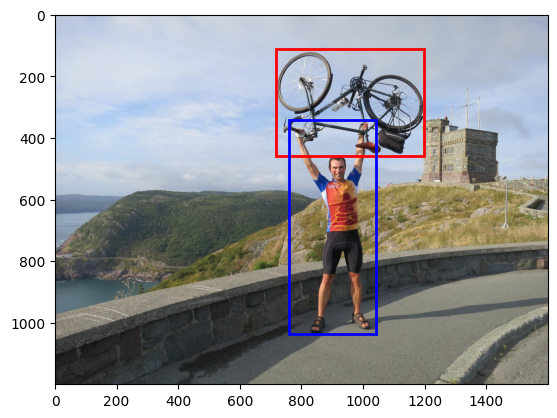

In [10]:
#plot unrel with its bounding boxes
#to plot bounding box, rect plot is in this format patches.Rectangle((xmin,ymin),width,height)

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import ast

unrel_images = unrel_root+"/"+os.listdir(unrel_root)[1]
unrel_csv_file = unrel_root+"/"+os.listdir(unrel_root)[-1]
unrel_df = pd.read_csv(unrel_csv_file)

idx=1
img=Image.open(unrel_images+"/"+str(idx)+".jpg")
fig,ax=plt.subplots()
ax.imshow(img)

subject_box =  ast.literal_eval(unrel_df[unrel_df["img_id"]==idx]["subject_box"][0])
object_box =  ast.literal_eval(unrel_df[unrel_df["img_id"]==idx]["object_box"][0])
subject_ =  unrel_df[unrel_df["img_id"]==idx]["subject"][0]
object_ =  unrel_df[unrel_df["img_id"]==idx]["object"][0]
relationship =  unrel_df[unrel_df["img_id"]==idx]["relationship"][0]
print("subject: ",subject_)
print("relationship: ",relationship)
print("object: ",object_)

xmin_subj,ymin_subj,xmax_subj,ymax_subj=subject_box
w_subj,h_subj=xmax_subj-xmin_subj,ymax_subj-ymin_subj

xmin_obj,ymin_obj,xmax_obj,ymax_obj=object_box
w_obj,h_obj=xmax_obj-xmin_obj,ymax_obj-ymin_obj

#plot subject bb - red
rect_subj = patches.Rectangle((xmin_subj, ymin_subj), w_subj, h_subj, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect_subj)

#plot object bb - blue
rect_obj = patches.Rectangle((xmin_obj, ymin_obj), w_obj, h_obj, linewidth=2, edgecolor='b', facecolor='none')
ax.add_patch(rect_obj)

plt.show()

subject:  Torus
relationship:  above
object:  Arch


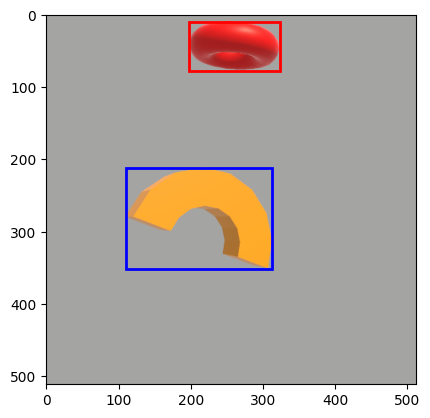

In [11]:
#plot spur with its bounding boxes - using above
#to plot bounding box, rect plot is in this format patches.Rectangle((xmin,ymin),width,height)

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import ast

spur_above_images = unrel_root+"/"+os.listdir(spur_root)[-2]
spur_above_file = unrel_root+"/"+os.listdir(unrel_root)[-1]
spur_above_df = pd.read_csv(spur_above_file)

relationship="above"
sample_spur_images = f'/Users/haidiazaman/Desktop/FYP/y3s2/data_for_mini_SPUR_unrel_expt/mini_spur/{relationship}/images/'
sample_spur_file = f'/Users/haidiazaman/Desktop/FYP/y3s2/data_for_mini_SPUR_unrel_expt/mini_spur/{relationship}.csv'
sample_spur_df = pd.read_csv(sample_spur_file)

idx=100
img_ = sample_spur_images + sorted(os.listdir(sample_spur_images),key=lambda x: int(x.split(".")[0].split("_")[-1]))[idx]
img=Image.open(img_)
fig,ax=plt.subplots()
ax.imshow(img)

subject_box = ast.literal_eval(sample_spur_df.iloc[idx,4])
object_box = ast.literal_eval(sample_spur_df.iloc[idx,5])
subject_ = sample_spur_df.iloc[idx,2]
object_ = sample_spur_df.iloc[idx,3]
relationship = sample_spur_df.iloc[idx,-1]
print("subject: ",subject_)
print("relationship: ",relationship)
print("object: ",object_)

xmin_subj,ymin_subj,w_subj,h_subj=subject_box
xmin_obj,ymin_obj,w_obj,h_obj=object_box

#plot subject bb - red
rect_subj = patches.Rectangle((xmin_subj,ymin_subj), w_subj, h_subj, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect_subj)

#plot object bb - blue
rect_obj = patches.Rectangle((xmin_obj,ymin_obj), w_obj, h_obj, linewidth=2, edgecolor='b', facecolor='none')
ax.add_patch(rect_obj)

plt.show()

plt.show()

# combine mini_SPUR data tgt into like unrel

## combine dfs and fix the img id filenames

In [29]:
# #combine all 4 folders into 1 image folder
# import os
# from tqdm import tqdm

# src_folder1 = "/Users/haidiazaman/Desktop/FYP/y3s2/data_for_mini_SPUR_unrel_expt/mini_spur/above/images"  # replace with the path to the first folder
# src_folder2 = "/Users/haidiazaman/Desktop/FYP/y3s2/data_for_mini_SPUR_unrel_expt/mini_spur/below/images"  # replace with the path to the second folder
# src_folder3 = "/Users/haidiazaman/Desktop/FYP/y3s2/data_for_mini_SPUR_unrel_expt/mini_spur/inside/images"  # replace with the path to the second folder
# src_folder4 = "/Users/haidiazaman/Desktop/FYP/y3s2/data_for_mini_SPUR_unrel_expt/mini_spur/on/images"  # replace with the path to the second folder

# dst_folder = "/Users/haidiazaman/Desktop/FYP/y3s2/data_for_mini_SPUR_unrel_expt/mini_spur/images"  # replace with the path to the destination folder

# on_files = sorted(os.listdir(src_folder4),key=lambda x: int(x.split(".")[0].split("_")[-1]))

# for i in tqdm(range(2,502)):
#     # Copy the file from folder1 to the destination folder
#     src_path = os.path.join(src_folder1,"rgb_" +str(i) + ".png")
#     dst_path = os.path.join(dst_folder,"rgb_" + str(i-1) + ".png")
#     os.system("cp {} {}".format(src_path, dst_path))
    
#     # Copy the file from folder2 to the destination folder
#     src_path = os.path.join(src_folder2,"rgb_" + str(i) + ".png")
#     dst_path = os.path.join(dst_folder,"rgb_" + str(i-1 + 500) + ".png")
#     os.system("cp {} {}".format(src_path, dst_path))
    
#     # Copy the file from folder3 to the destination folder
#     src_path = os.path.join(src_folder3,"rgb_" + str(i) + ".png")
#     dst_path = os.path.join(dst_folder,"rgb_" + str(i-1 + 1000) + ".png")
#     os.system("cp {} {}".format(src_path, dst_path))
    
#     # Copy the file from folder4 to the destination folder
#     img_file = on_files[i-2]
#     src_path = os.path.join(src_folder4,img_file)
#     dst_path = os.path.join(dst_folder,"rgb_" + str(i-1 + 1500) + ".png")
#     os.system("cp {} {}".format(src_path, dst_path))

100%|█████████████████████████████████████████| 500/500 [00:15<00:00, 31.30it/s]


In [33]:
df1=pd.read_csv("/Users/haidiazaman/Desktop/FYP/y3s2/data_for_mini_SPUR_unrel_expt/mini_spur/above.csv")
df2=pd.read_csv("/Users/haidiazaman/Desktop/FYP/y3s2/data_for_mini_SPUR_unrel_expt/mini_spur/below.csv")
df3=pd.read_csv("/Users/haidiazaman/Desktop/FYP/y3s2/data_for_mini_SPUR_unrel_expt/mini_spur/inside.csv")
df4=pd.read_csv("/Users/haidiazaman/Desktop/FYP/y3s2/data_for_mini_SPUR_unrel_expt/mini_spur/on.csv")

df4.head()

,file_name,img_id,subject,object,subject_box,object_box,relationship
0,rgb_3.png,3,Sphere,Capsule,"[98.0, 196.0, 65.0, 63.0]","[78.0, 259.0, 80.0, 110.0]",on
1,rgb_5.png,5,Cylinder,Cone,"[306.0, 81.0, 82.0, 153.0]","[326.0, 233.0, 63.0, 59.0]",on
2,rgb_7.png,7,Cone,Capsule,"[218.0, 192.0, 58.0, 61.0]","[217.0, 251.0, 55.0, 98.0]",on
3,rgb_9.png,9,Cube,Torus,"[258.0, 66.0, 105.0, 104.0]","[245.0, 155.0, 142.0, 54.0]",on
4,rgb_11.png,11,Prism,Torus,"[129.0, 249.0, 85.0, 81.0]","[107.0, 315.0, 129.0, 47.0]",on


In [55]:
combined_df = pd.concat([df1,df2,df3,df4])
combined_df = combined_df.reset_index(drop=True)
combined_df = combined_df.reset_index()
combined_df["file_name"] = combined_df["index"].apply(lambda x: "rgb_"+str(x+1)+".png")
combined_df["img_id"] = combined_df["index"].apply(lambda x: int(x+1))
combined_df = combined_df.drop("index",axis=1)

In [57]:
file_name = "spur_images_labels.csv"
combined_df.to_csv(file_name,index=False)

## drop the img_id from both spur and unrel csv

In [58]:
spur_file = "/Users/haidiazaman/Desktop/FYP/y3s2/data_for_mini_SPUR_unrel_expt/mini_spur/spur_images_labels.csv"
unrel_file = "/Users/haidiazaman/Desktop/FYP/y3s2/data_for_mini_SPUR_unrel_expt/unrel/unrel_images_labels.csv"

spur_df=pd.read_csv(spur_file)
unrel_df=pd.read_csv(unrel_file)

In [59]:
spur_df.head()

,file_name,img_id,subject,object,subject_box,object_box,relationship
0,rgb_1.png,1,Torus,Prism,"[104.0, 34.0, 127.0, 63.0]","[139.0, 247.0, 85.0, 80.0]",above
1,rgb_2.png,2,Pipe,Cube,"[251.0, 98.0, 126.0, 134.0]","[299.0, 349.0, 78.0, 69.0]",above
2,rgb_3.png,3,Cone,Sphere,"[205.0, 67.0, 62.0, 79.0]","[194.0, 292.0, 47.0, 47.0]",above
3,rgb_4.png,4,Cube,Capsule,"[280.0, 57.0, 92.0, 106.0]","[301.0, 284.0, 101.0, 85.0]",above
4,rgb_5.png,5,Prism,Pipe,"[4.0, 76.0, 88.0, 102.0]","[0.0, 277.0, 107.0, 145.0]",above


In [60]:
unrel_df.head()

,file_name,img_id,subject,object,subject_box,object_box,relationship
0,1.jpg,1,bike,person,"[716, 111, 1197, 457]","[760, 342, 1042, 1037]",above
1,2.jpg,2,bike,person,"[383, 355, 803, 710]","[610, 534, 888, 1000]",above
2,3.jpg,3,bike,person,"[1, 1, 671, 612]","[231, 118, 528, 960]",above
3,4.jpg,4,bike,person,"[205, 79, 369, 189]","[229, 131, 318, 276]",above
4,5.jpg,5,bike,person,"[285, 46, 589, 231]","[352, 138, 523, 498]",above


In [61]:
spur_df = spur_df.drop("img_id",axis=1)
unrel_df = unrel_df.drop("img_id",axis=1)

In [62]:
spur_df.head()

,file_name,subject,object,subject_box,object_box,relationship
0,rgb_1.png,Torus,Prism,"[104.0, 34.0, 127.0, 63.0]","[139.0, 247.0, 85.0, 80.0]",above
1,rgb_2.png,Pipe,Cube,"[251.0, 98.0, 126.0, 134.0]","[299.0, 349.0, 78.0, 69.0]",above
2,rgb_3.png,Cone,Sphere,"[205.0, 67.0, 62.0, 79.0]","[194.0, 292.0, 47.0, 47.0]",above
3,rgb_4.png,Cube,Capsule,"[280.0, 57.0, 92.0, 106.0]","[301.0, 284.0, 101.0, 85.0]",above
4,rgb_5.png,Prism,Pipe,"[4.0, 76.0, 88.0, 102.0]","[0.0, 277.0, 107.0, 145.0]",above


In [63]:
unrel_df.head()

,file_name,subject,object,subject_box,object_box,relationship
0,1.jpg,bike,person,"[716, 111, 1197, 457]","[760, 342, 1042, 1037]",above
1,2.jpg,bike,person,"[383, 355, 803, 710]","[610, 534, 888, 1000]",above
2,3.jpg,bike,person,"[1, 1, 671, 612]","[231, 118, 528, 960]",above
3,4.jpg,bike,person,"[205, 79, 369, 189]","[229, 131, 318, 276]",above
4,5.jpg,bike,person,"[285, 46, 589, 231]","[352, 138, 523, 498]",above


In [64]:
len(spur_df),len(unrel_df)

(2000, 1071)

In [66]:
spur_df.to_csv(spur_file,index=False)
unrel_df.to_csv(unrel_file,index=False)

In [67]:
spur_file = "/Users/haidiazaman/Desktop/FYP/y3s2/data_for_mini_SPUR_unrel_expt/mini_spur/spur_images_labels.csv"
unrel_file = "/Users/haidiazaman/Desktop/FYP/y3s2/data_for_mini_SPUR_unrel_expt/unrel/unrel_images_labels.csv"

spur_df=pd.read_csv(spur_file)
unrel_df=pd.read_csv(unrel_file)

In [68]:
spur_df.head()

,file_name,subject,object,subject_box,object_box,relationship
0,rgb_1.png,Torus,Prism,"[104.0, 34.0, 127.0, 63.0]","[139.0, 247.0, 85.0, 80.0]",above
1,rgb_2.png,Pipe,Cube,"[251.0, 98.0, 126.0, 134.0]","[299.0, 349.0, 78.0, 69.0]",above
2,rgb_3.png,Cone,Sphere,"[205.0, 67.0, 62.0, 79.0]","[194.0, 292.0, 47.0, 47.0]",above
3,rgb_4.png,Cube,Capsule,"[280.0, 57.0, 92.0, 106.0]","[301.0, 284.0, 101.0, 85.0]",above
4,rgb_5.png,Prism,Pipe,"[4.0, 76.0, 88.0, 102.0]","[0.0, 277.0, 107.0, 145.0]",above


In [69]:
unrel_df.head()

,file_name,subject,object,subject_box,object_box,relationship
0,1.jpg,bike,person,"[716, 111, 1197, 457]","[760, 342, 1042, 1037]",above
1,2.jpg,bike,person,"[383, 355, 803, 710]","[610, 534, 888, 1000]",above
2,3.jpg,bike,person,"[1, 1, 671, 612]","[231, 118, 528, 960]",above
3,4.jpg,bike,person,"[205, 79, 369, 189]","[229, 131, 318, 276]",above
4,5.jpg,bike,person,"[285, 46, 589, 231]","[352, 138, 523, 498]",above


## filter unrel for only the relationships that will be tested

In [87]:
unrel_file = "/Users/haidiazaman/Desktop/FYP/y3s2/data_for_mini_SPUR_unrel_expt/unrel/unrel_images_labels.csv"

unrel_df=pd.read_csv(unrel_file)
unrel_df.tail()

,file_name,subject,object,subject_box,object_box,relationship
1066,1186.jpg,car,road,"[79, 144, 539, 329]","[1, 306, 600, 450]",above
1067,1189.jpg,elephant,tree,"[119, 25, 291, 189]","[2, 1, 379, 477]",in
1068,1194.jpg,car,building,"[105, 112, 281, 298]","[1, 1, 334, 383]",in
1069,1195.jpg,car,building,"[226, 158, 457, 344]","[1, 1, 504, 335]",in
1070,1196.jpg,car,roof,"[194, 38, 342, 138]","[66, 91, 435, 192]",on the top of


In [88]:
len(unrel_df),unrel_df["relationship"].unique()

(1071,
 array(['above', 'has', 'in', 'on the top of', 'under', 'ride', 'wear',
        'rest on', 'pull', 'drive', 'taller than', 'sleep on', 'carry',
        'on', 'hold', 'inside', 'stand on', 'cover'], dtype=object))

rels to use: above & on the top of (above), under (below), rest on & sleep on & on & stand on (on), inside

4 prepositions from 
above - 2 classes: above & on the top of
below - 1 class: under
on - 4 classes: rest on & sleep on & on & stand on
inside - 1 class: inside

In [89]:
relevant_classes = ["above","on the top of","under","rest on","sleep on","on","stand on","inside"]
unrel_df = unrel_df[unrel_df["relationship"].isin(relevant_classes)]
len(unrel_df),unrel_df["relationship"].unique()

(419,
 array(['above', 'on the top of', 'under', 'rest on', 'sleep on', 'on',
        'inside', 'stand on'], dtype=object))

In [90]:
unrel_df["relationship"] = unrel_df["relationship"].apply(lambda x: "above" if x=="on the top of" else(x))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [91]:
len(unrel_df),unrel_df["relationship"].unique()

(419,
 array(['above', 'under', 'rest on', 'sleep on', 'on', 'inside',
        'stand on'], dtype=object))

In [92]:
unrel_df["relationship"] = unrel_df["relationship"].apply(lambda x: "below" if x=="under" else(x))
len(unrel_df),unrel_df["relationship"].unique()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(419,
 array(['above', 'below', 'rest on', 'sleep on', 'on', 'inside',
        'stand on'], dtype=object))

In [93]:
unrel_df["relationship"] = unrel_df["relationship"].apply(lambda x: "on" if x=="rest on" else(x))
unrel_df["relationship"] = unrel_df["relationship"].apply(lambda x: "on" if x=="sleep on" else(x))
unrel_df["relationship"] = unrel_df["relationship"].apply(lambda x: "on" if x=="stand on" else(x))

len(unrel_df),unrel_df["relationship"].unique()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy

(419, array(['above', 'below', 'on', 'inside'], dtype=object))

In [96]:
unrel_file = "/Users/haidiazaman/Desktop/FYP/y3s2/data_for_mini_SPUR_unrel_expt/unrel/unrel_images_labels.csv"

unrel_df.to_csv(unrel_file,index=False)

## filter unrel images to the ones remaining in unrel_df

In [103]:
import os 
from tqdm import tqdm

src_folder="/Users/haidiazaman/Desktop/FYP/y3s2/data_for_mini_SPUR_unrel_expt/unrel/old_images"
dst_folder="/Users/haidiazaman/Desktop/FYP/y3s2/data_for_mini_SPUR_unrel_expt/unrel/images"

unrel_file = "/Users/haidiazaman/Desktop/FYP/y3s2/data_for_mini_SPUR_unrel_expt/unrel/unrel_images_labels.csv"

unrel_df = pd.read_csv(unrel_file)
unrel_df.tail()
final_images_list = unrel_df["file_name"].to_list()

for i in tqdm(range(len(final_images_list))):
    src_path = os.path.join(src_folder,final_images_list[i])
    dst_path = os.path.join(dst_folder,final_images_list[i])
    os.system("cp {} {}".format(src_path,dst_path))

100%|████████████████████████████████████████| 419/419 [00:03<00:00, 118.26it/s]


## change unrel bounding box 
- from xmin ymin xmax ymax to xmin ymin w h

In [143]:
unrel_file = "/Users/haidiazaman/Desktop/FYP/y3s2/data_for_mini_SPUR_unrel_expt/unrel/unrel_images_labels.csv"
unrel_df = pd.read_csv(unrel_file)
unrel_df

,file_name,subject,object,subject_box,object_box,relationship
0,1.jpg,bike,person,"[716, 111, 1197, 457]","[760, 342, 1042, 1037]",above
1,2.jpg,bike,person,"[383, 355, 803, 710]","[610, 534, 888, 1000]",above
2,3.jpg,bike,person,"[1, 1, 671, 612]","[231, 118, 528, 960]",above
3,4.jpg,bike,person,"[205, 79, 369, 189]","[229, 131, 318, 276]",above
4,5.jpg,bike,person,"[285, 46, 589, 231]","[352, 138, 523, 498]",above
...,...,...,...,...,...,...
414,1169.jpg,car,car,"[194, 315, 554, 432]","[206, 413, 572, 515]",above
415,1177.jpg,person,table,"[190, 258, 210, 302]","[86, 112, 359, 298]",below
416,1182.jpg,person,car,"[119, 62, 253, 280]","[1, 236, 395, 400]",above
417,1186.jpg,car,road,"[79, 144, 539, 329]","[1, 306, 600, 450]",above


In [156]:
import ast

unrel_file = "/Users/haidiazaman/Desktop/FYP/y3s2/data_for_mini_SPUR_unrel_expt/unrel/unrel_images_labels.csv"
unrel_df = pd.read_csv(unrel_file)

unrel_df["subject_xmin"] = unrel_df["subject_box"].apply(lambda x: ast.literal_eval(x)[0])
unrel_df["subject_ymin"] = unrel_df["subject_box"].apply(lambda x: ast.literal_eval(x)[1])
unrel_df["subject_w"] = unrel_df["subject_box"].apply(lambda x: ast.literal_eval(x)[2]-ast.literal_eval(x)[0])
unrel_df["subject_h"] = unrel_df["subject_box"].apply(lambda x: ast.literal_eval(x)[3]-ast.literal_eval(x)[1])
unrel_df["object_xmin"] = unrel_df["object_box"].apply(lambda x: ast.literal_eval(x)[0])
unrel_df["object_ymin"] = unrel_df["object_box"].apply(lambda x: ast.literal_eval(x)[1])
unrel_df["object_w"] = unrel_df["object_box"].apply(lambda x: ast.literal_eval(x)[2]-ast.literal_eval(x)[0])
unrel_df["object_h"] = unrel_df["object_box"].apply(lambda x: ast.literal_eval(x)[3]-ast.literal_eval(x)[1])


unrel_df["subject_box"] = unrel_df.apply(lambda x: [x["subject_xmin"]]+[x["subject_ymin"]]+[x["subject_w"]]+[x["subject_h"]],axis=1)
unrel_df["object_box"] = unrel_df.apply(lambda x: [x["object_xmin"]]+[x["object_ymin"]]+[x["object_w"]]+[x["object_h"]],axis=1)
unrel_df = unrel_df[['file_name', 'subject', 'object', 'subject_box', 'object_box','relationship']]
unrel_df["relationship"].unique()

array(['above', 'below', 'on', 'inside'], dtype=object)

In [157]:
unrel_df.to_csv(unrel_file,index=False)

# code for project
- all data preprocessing done

In [1]:
import os
spur_labels_csv="/Users/haidiazaman/Desktop/FYP/y3s2/data_for_mini_SPUR_unrel_expt/mini_spur/spur_images_labels.csv"
spur_images_folder="/Users/haidiazaman/Desktop/FYP/y3s2/data_for_mini_SPUR_unrel_expt/mini_spur/images"
unrel_labels_csv="/Users/haidiazaman/Desktop/FYP/y3s2/data_for_mini_SPUR_unrel_expt/unrel/unrel_images_labels.csv"
unrel_images_folder="/Users/haidiazaman/Desktop/FYP/y3s2/data_for_mini_SPUR_unrel_expt/unrel/images"

In [2]:
import pandas as pd
spur_df = pd.read_csv(spur_labels_csv)
unrel_df = pd.read_csv(unrel_labels_csv)

In [100]:
# df for SPUR
print(len(spur_df))
spur_df.head()

2000


,file_name,subject,object,subject_box,object_box,relationship
0,rgb_1.png,Torus,Prism,"[104.0, 34.0, 127.0, 63.0]","[139.0, 247.0, 85.0, 80.0]",above
1,rgb_2.png,Pipe,Cube,"[251.0, 98.0, 126.0, 134.0]","[299.0, 349.0, 78.0, 69.0]",above
2,rgb_3.png,Cone,Sphere,"[205.0, 67.0, 62.0, 79.0]","[194.0, 292.0, 47.0, 47.0]",above
3,rgb_4.png,Cube,Capsule,"[280.0, 57.0, 92.0, 106.0]","[301.0, 284.0, 101.0, 85.0]",above
4,rgb_5.png,Prism,Pipe,"[4.0, 76.0, 88.0, 102.0]","[0.0, 277.0, 107.0, 145.0]",above


In [101]:
# df for UnRel dataset of real life images
print(len(unrel_df))
unrel_df.head()

419


,file_name,subject,object,subject_box,object_box,relationship
0,1.jpg,bike,person,"[716, 111, 481, 346]","[760, 342, 282, 695]",above
1,2.jpg,bike,person,"[383, 355, 420, 355]","[610, 534, 278, 466]",above
2,3.jpg,bike,person,"[1, 1, 670, 611]","[231, 118, 297, 842]",above
3,4.jpg,bike,person,"[205, 79, 164, 110]","[229, 131, 89, 145]",above
4,5.jpg,bike,person,"[285, 46, 304, 185]","[352, 138, 171, 360]",above


In [87]:
len(images)

4

In [84]:
boxes

[[tensor([223.,  51., 333., 285.], dtype=torch.float64),
  tensor([248.,  84., 379., 150.], dtype=torch.float64),
  tensor([87., 62., 75., 47.], dtype=torch.float64),
  tensor([ 65., 105.,  94.,  51.], dtype=torch.float64)],
 [tensor([231.,  12., 322., 179.], dtype=torch.float64),
  tensor([309., 185., 175., 197.], dtype=torch.float64),
  tensor([ 68., 159.,  47., 261.], dtype=torch.float64),
  tensor([ 62., 135.,  46., 110.], dtype=torch.float64)]]

/Users/haidiazaman/Desktop/FYP/y3s2/data_for_mini_SPUR_unrel_expt/mini_spur/images/rgb_1840.png
subject:  Cube
relationship:  on
object:  Cube


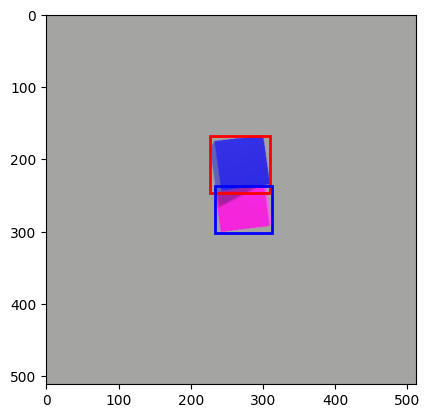

In [243]:
idx=1839
#set idx of image

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import ast

# sort images file names in numerical order
spur_images=sorted(os.listdir(spur_images_folder),key=lambda x: int(x.split(".")[0].split("_")[-1]))

#read image into array
img_path=spur_images_folder+"/"+spur_images[idx]
print(img_path)
img=plt.imread(img_path)

#plot image first
fig, ax = plt.subplots()
ax.imshow(img)

#get subject object relationship and bounding boxes info
subject_ = spur_df.iloc[idx][1]
object_ = spur_df.iloc[idx][2]
subject_box = ast.literal_eval(spur_df.iloc[idx][3])
object_box = ast.literal_eval(spur_df.iloc[idx][4])
relationship = spur_df.iloc[idx][-1]
print("subject: ",subject_)
print("relationship: ",relationship)
print("object: ",object_)

# assign xmin ymin w h to the respective bounding box
xmin_subj,ymin_subj,w_subj,h_subj=subject_box
xmin_obj,ymin_obj,w_obj,h_obj=object_box

#plot subject bb - red
rect_subj = patches.Rectangle((xmin_subj,ymin_subj), w_subj, h_subj, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect_subj)

#plot object bb - blue
rect_obj = patches.Rectangle((xmin_obj,ymin_obj), w_obj, h_obj, linewidth=2, edgecolor='b', facecolor='none')
ax.add_patch(rect_obj)

plt.show()

/Users/haidiazaman/Desktop/FYP/y3s2/data_for_mini_SPUR_unrel_expt/unrel/images/94.jpg
subject:  cone
relationship:  above
object:  person


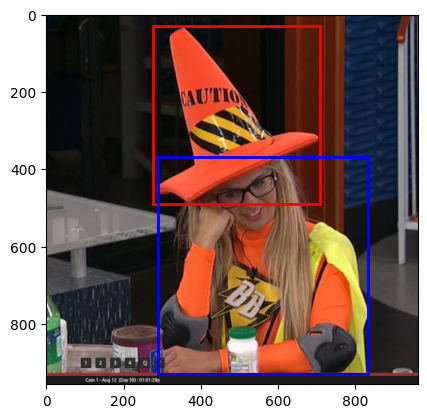

In [244]:
idx=52

#set idx of image

from PIL import Image
import matplotlib.patches as patches
import ast

# sort images file names in numerical order
unrel_images=sorted(os.listdir(unrel_images_folder),key=lambda x: int(x.split(".")[0].split("_")[-1]))

#read image into array
img_path=unrel_images_folder+"/"+unrel_images[idx]
print(img_path)
img=Image.open(img_path)

#plot image first
fig, ax = plt.subplots()
ax.imshow(img)

#get subject object relationship and bounding boxes info
subject_ = unrel_df.iloc[idx][1]
object_ = unrel_df.iloc[idx][2]
subject_box = ast.literal_eval(unrel_df.iloc[idx][3])
object_box = ast.literal_eval(unrel_df.iloc[idx][4])
relationship = unrel_df.iloc[idx][-1]
print("subject: ",subject_)
print("relationship: ",relationship)
print("object: ",object_)

# assign xmin ymin w h to the respective bounding box
xmin_subj,ymin_subj,w_subj,h_subj=subject_box
xmin_obj,ymin_obj,w_obj,h_obj=object_box

#plot subject bb - red
rect_subj = patches.Rectangle((xmin_subj,ymin_subj), w_subj, h_subj, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect_subj)

#plot object bb - blue
rect_obj = patches.Rectangle((xmin_obj,ymin_obj), w_obj, h_obj, linewidth=2, edgecolor='b', facecolor='none')
ax.add_patch(rect_obj)

plt.show()

In [20]:
from PIL import Image
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

class ImageDataset(Dataset):
    def __init__(self, image_paths, bounding_boxes, relationships, transform=None):
        self.image_paths = image_paths
        self.bounding_boxes = bounding_boxes
        self.relationships = relationships
        self.transform = transform
        
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        boxes = self.bounding_boxes[idx]
        relationships = self.relationships[idx]
        return image, boxes, relationships

In [80]:
import ast

image_paths = [spur_images_folder+"/"+x for x in spur_df["file_name"].to_list()]

subject_boxes = [ast.literal_eval(x) for x in spur_df.subject_box.to_list()]
object_boxes = [ast.literal_eval(x) for x in spur_df.object_box.to_list()]
bounding_boxes = [(x,y) for x,y in zip(subject_boxes,object_boxes)]

relationships = spur_df.relationship.to_list()

transform = transforms.Compose([transforms.Resize(512),
#                                 transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                     std=[0.229, 0.224, 0.225])])

In [53]:
dataset = ImageDataset(image_paths, bounding_boxes, relationships, transform)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

In [ ]:
# import torchvision.models as models
# r3d_18 = models.video.r3d_18(weights = 'KINETICS400_V1')
# r3d_18.fc = nn.Linear(in_features = 512, out_features=data.c)
# # r3d_18 = r3d_18.to(device)

In [61]:
#set pretrained = True to load the best available pre-trained weights
#if set pretrained = False, the weights will be randomised, however theres diff ways to initialise the weights too
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

resnet = models.resnet18(pretrained=True)
resnet.fc = nn.Linear(512, 4)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/haidiazaman/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [66]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
resnet = resnet.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(resnet.parameters(), lr=0.001, momentum=0.9)

resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [172]:
for epoch in range(10):
    for images, boxes, relationships in dataloader:
        break
        images = images.to(device)
        boxes = boxes.to(device)
        relationships = relationships.to(device)
        
        outputs = resnet(images)
        loss = criterion(outputs, relationships)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [175]:
relationships

('below', 'below', 'below', 'inside')

In [174]:
boxes

[[tensor([232., 385., 353., 223.], dtype=torch.float64),
  tensor([293., 382., 211., 274.], dtype=torch.float64),
  tensor([43., 94., 55., 57.], dtype=torch.float64),
  tensor([57., 83., 63., 79.], dtype=torch.float64)],
 [tensor([189., 320., 324., 121.], dtype=torch.float64),
  tensor([ 11., 119.,   0., 178.], dtype=torch.float64),
  tensor([140., 192.,  88., 266.], dtype=torch.float64),
  tensor([173., 176.,  65., 267.], dtype=torch.float64)]]

In [173]:
images

tensor([[[[0.6906, 0.6906, 0.6906,  ..., 0.6906, 0.6906, 0.6906],
          [0.6906, 0.6906, 0.6906,  ..., 0.6906, 0.6906, 0.6906],
          [0.6906, 0.6906, 0.6906,  ..., 0.6906, 0.6906, 0.6906],
          ...,
          [0.6906, 0.6906, 0.6906,  ..., 0.6906, 0.6906, 0.6906],
          [0.6906, 0.6906, 0.6906,  ..., 0.6906, 0.6906, 0.6906],
          [0.6906, 0.6906, 0.6906,  ..., 0.6906, 0.6906, 0.6906]],

         [[0.8354, 0.8354, 0.8354,  ..., 0.8354, 0.8354, 0.8354],
          [0.8354, 0.8354, 0.8354,  ..., 0.8354, 0.8354, 0.8354],
          [0.8354, 0.8354, 0.8354,  ..., 0.8354, 0.8354, 0.8354],
          ...,
          [0.8354, 0.8354, 0.8354,  ..., 0.8354, 0.8354, 0.8354],
          [0.8354, 0.8354, 0.8354,  ..., 0.8354, 0.8354, 0.8354],
          [0.8354, 0.8354, 0.8354,  ..., 0.8354, 0.8354, 0.8354]],

         [[1.0365, 1.0365, 1.0365,  ..., 1.0365, 1.0365, 1.0365],
          [1.0365, 1.0365, 1.0365,  ..., 1.0365, 1.0365, 1.0365],
          [1.0365, 1.0365, 1.0365,  ..., 1

# from chatgpt

In [191]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image

# Define a custom dataset class
class PrepositionDataset(Dataset):
    def __init__(self, image_paths, objects, labels, bboxes, transform=None):
        self.image_paths = image_paths
        self.objects = objects
        self.labels = labels
        self.bboxes = bboxes
        self.transform = transform
        
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = plt.imread(img_path)
        subj, obj = self.objects[idx]
        label = self.labels[idx]
        
        bbox1, bbox2 = self.bboxes[idx]
        x1, y1, w1, h1 = bbox1
        x2, y2, w2, h2 = bbox2
        subject_box = (x1, y1, x1 + w1, y1 + h1) #change format to x1min,y1min,x1max,y1max for crop function
        object_box = (x2, y2, x2 + w2, y2 + h2) #change format to x2min,y2min,x2max,y2max for crop function
        subject_img = image.crop(subject_box)
        object_img = image.crop(object_box)
        if self.transform:
            subject_img = self.transform(subject_img)
            object_img = self.transform(object_img)
            
        return image,(subj, obj),label,(subject_img, object_img)

In [192]:
import ast

image_paths = [spur_images_folder+"/"+x for x in spur_df["file_name"].to_list()]
relationships = spur_df.relationship.to_list() #labels
objects = [(x,y) for x,y in zip(spur_df.subject.to_list(),spur_df.object.to_list())]

subject_boxes = [ast.literal_eval(x) for x in spur_df.subject_box.to_list()]
object_boxes = [ast.literal_eval(x) for x in spur_df.object_box.to_list()]
bounding_boxes = [(x,y) for x,y in zip(subject_boxes,object_boxes)]

transform = transforms.Compose([transforms.Resize((512,512)),
#                                 transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                     std=[0.229, 0.224, 0.225])])

len(image_paths),len(objects),len(relationships),len(bounding_boxes)

In [194]:
spur_dataset = PrepositionDataset(image_paths,objects,relationships,bounding_boxes,transform)
spur_dataloader = DataLoader(spur_dataset, batch_size=4, shuffle=True)

In [195]:
spur_dataset.__getitem__(0)

AttributeError: 'numpy.ndarray' object has no attribute 'crop'

In [190]:
for img,obj,bb,rel in spur_dataloader:
    break

RuntimeError: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 0

In [119]:
len(img),len(bb),len(rel)

(4, 2, 4)

In [120]:
bb

[[tensor([303., 142., 277., 337.], dtype=torch.float64),
  tensor([204., 146., 222., 412.], dtype=torch.float64),
  tensor([117.,  83., 112.,  84.], dtype=torch.float64),
  tensor([ 56.,  38., 101., 100.], dtype=torch.float64)],
 [tensor([314., 177., 222., 357.], dtype=torch.float64),
  tensor([435., 364.,   0., 214.], dtype=torch.float64),
  tensor([ 48.,  42., 171.,  52.], dtype=torch.float64),
  tensor([ 52.,  50., 138.,  58.], dtype=torch.float64)]]

In [121]:
rel

('above', 'above', 'below', 'below')

In [ ]:
plt.imshow

In [106]:
# Define a function to train the model
def train(model, criterion, optimizer, train_loader, device):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs = [x.to(device) for x in inputs]
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(*inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    return running_loss / len(train_loader)

# Define a function to evaluate the model
def evaluate(model, criterion, val_loader, device):
    model.eval()
    running_loss = 0.0
    total = 0
    correct = 0
    with torch.no_grad():
        for i, data in enumerate(val_loader, 0):
            inputs, labels = data
            inputs = [x.to(device) for x in inputs]
            labels = labels.to(device)
            outputs = model(*inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    return running_loss / len(val_loader), accuracy

In [107]:
# Define the model architecture
class PrepositionModel(nn.Module):
    def __init__(self):
        super(PrepositionModel, self).__init__()
        self.resnet = models.resnet18(pretrained=True)
        self.fc1 = nn.Linear(2*512, 128)
        self.fc2 = nn.Linear(128, 4)
        
    def forward(self, x1, x2):
        x1 = self.resnet(x1)
        x2 = self.resnet(x2)
        x = torch.cat((x1, x2), dim=1)
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.fc2(x)
        return x

In [ ]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm

# Set up hyperparameters
batch_size = 32
lr = 0.001
num_epochs = 10

# Set up dataloaders
train_dataset = MyDataset(train_image_paths, train_bounding_boxes, train_labels, transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = MyDataset(val_image_paths, val_bounding_boxes, val_labels, transform)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Set up model
model = MyModel()
model.to(device)

# Set up loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

# Training loop
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    print("-" * 10)

    # Train
    model.train()
    train_loss = 0.0
    train_correct = 0

    for images, bboxes, labels in tqdm(train_loader):
        images = images.to(device)
        bboxes = bboxes.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images, bboxes)
        _, predicted = torch.max(outputs, 1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)
        train_correct += (predicted == labels).sum().item()

    train_loss = train_loss / len(train_dataset)
    train_acc = train_correct / len(train_dataset)

    print(f"Train loss: {train_loss:.4f}, Train accuracy: {train_acc:.4f}")

    # Evaluate
    model.eval()
    val_loss = 0.0
    val_correct = 0

    with torch.no_grad():
        for images, bboxes, labels in tqdm(val_loader):
            images = images.to(device)
            bboxes = bboxes.to(device)
            labels = labels.to(device)

            outputs = model(images, bboxes)
            _, predicted = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * images.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss = val_loss / len(val_dataset)
    val_acc = val_correct / len(val_dataset)

    print(f"Val loss: {val_loss:.4f}, Val accuracy: {val_acc:.4f}")


# try

In [228]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image

# Define a custom dataset class
class PrepositionDataset(Dataset):
    def __init__(self, image_paths, objects, labels, bboxes, transform=None):
        self.image_paths = image_paths
        self.objects = objects
        self.labels = labels
        self.bboxes = bboxes
        self.transform = transform
        
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path)
        subj, obj = self.objects[idx]
        label = self.labels[idx]
        bbox1, bbox2 = self.bboxes[idx]
#         x1, y1, w1, h1 = bbox1
#         x2, y2, w2, h2 = bbox2
        if self.transform:
            image = self.transform(image)
            
        return image,(subj, obj),label,(bbox1, bbox2)

In [229]:
import ast

image_paths = [spur_images_folder+"/"+x for x in spur_df["file_name"].to_list()]
relationships = spur_df.relationship.to_list() #labels
objects = [(x,y) for x,y in zip(spur_df.subject.to_list(),spur_df.object.to_list())]

subject_boxes = [ast.literal_eval(x) for x in spur_df.subject_box.to_list()]
object_boxes = [ast.literal_eval(x) for x in spur_df.object_box.to_list()]
bounding_boxes = [(x,y) for x,y in zip(subject_boxes,object_boxes)]

transform = transforms.Compose([transforms.Resize((512,512)),
#                                 transforms.CenterCrop(224),
                                transforms.ToTensor(),
#                                 #normalise values from Imagenet - default values for normalization when using pre-trained models that were trained on the ImageNet dataset.
#                                 transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                                                      std=[0.229, 0.224, 0.225])
                               ])

print(len(image_paths),len(objects),len(relationships),len(bounding_boxes))

#check output
from pprint import pprint
pprint(image_paths[:3])
print("\n")
pprint(objects[:3])
print("\n")
pprint(relationships[:3])
print("\n")
pprint(bounding_boxes[:3])

2000 2000 2000 2000
['/Users/haidiazaman/Desktop/FYP/y3s2/data_for_mini_SPUR_unrel_expt/mini_spur/images/rgb_1.png',
 '/Users/haidiazaman/Desktop/FYP/y3s2/data_for_mini_SPUR_unrel_expt/mini_spur/images/rgb_2.png',
 '/Users/haidiazaman/Desktop/FYP/y3s2/data_for_mini_SPUR_unrel_expt/mini_spur/images/rgb_3.png']


[('Torus', 'Prism'), ('Pipe', 'Cube'), ('Cone', 'Sphere')]


['above', 'above', 'above']


[([104.0, 34.0, 127.0, 63.0], [139.0, 247.0, 85.0, 80.0]),
 ([251.0, 98.0, 126.0, 134.0], [299.0, 349.0, 78.0, 69.0]),
 ([205.0, 67.0, 62.0, 79.0], [194.0, 292.0, 47.0, 47.0])]


In [230]:
spur_dataset = PrepositionDataset(image_paths,objects,relationships,bounding_boxes,transform)
spur_dataloader = DataLoader(spur_dataset,batch_size=4,shuffle=True)

In [231]:
for img,objs,rel,bbs in spur_dataloader:
    break

In [234]:
print(len(img),len(objs),len(rel),len(bbs))
print(len(objs[0]),len(objs[1]),len(bbs[0]),len(bbs[1]))

4 2 4 2
4 4 4 4


In [239]:
# #set pretrained = True to load the best available pre-trained weights
# #if set pretrained = False, the weights will be randomised, however theres diff ways to initialise the weights too
# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context

# resnet = models.resnet18(pretrained=True)
# resnet.fc = nn.Linear(512, 4)


# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# resnet = resnet.to(device)

# criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(resnet.parameters(), lr=0.001, momentum=0.9)

# resnet

# for epoch in range(10):
#     for images, boxes, relationships in dataloader:
# #         break
#         images = images.to(device)
#         boxes = boxes.to(device)
#         relationships = relationships.to(device)
        
#         outputs = resnet(images)
#         loss = criterion(outputs, relationships)
        
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

In [237]:
loss

NameError: name 'loss' is not defined

# old

In [108]:
#old 
unrel_df

,file_name,subject,object,subject_box,object_box,relationship
0,1.jpg,bike,person,"[716, 111, 1197, 457]","[760, 342, 1042, 1037]",above
1,2.jpg,bike,person,"[383, 355, 803, 710]","[610, 534, 888, 1000]",above
2,3.jpg,bike,person,"[1, 1, 671, 612]","[231, 118, 528, 960]",above
3,4.jpg,bike,person,"[205, 79, 369, 189]","[229, 131, 318, 276]",above
4,5.jpg,bike,person,"[285, 46, 589, 231]","[352, 138, 523, 498]",above
...,...,...,...,...,...,...
414,1169.jpg,car,car,"[194, 315, 554, 432]","[206, 413, 572, 515]",above
415,1177.jpg,person,table,"[190, 258, 210, 302]","[86, 112, 359, 298]",below
416,1182.jpg,person,car,"[119, 62, 253, 280]","[1, 236, 395, 400]",above
417,1186.jpg,car,road,"[79, 144, 539, 329]","[1, 306, 600, 450]",above
